**Hahmontunnistuksen** (Object detection) tavoitteena on tunnistaa ja **paikallistaa** eri luokkiin kuuluvia objekteja kuvista.

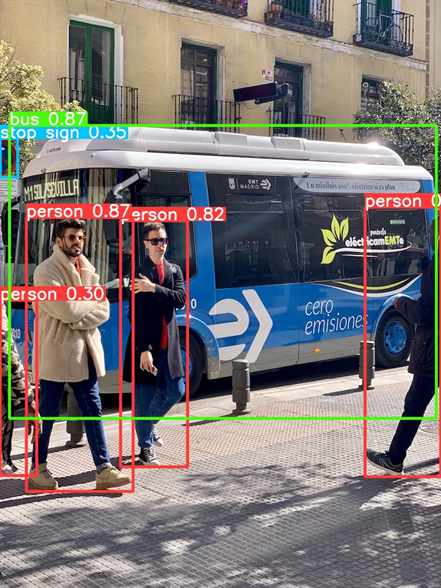

YOLO (You Only Look Once) on yksi hahmontunnistus-algoritmi.

[YOLOv1](https://pjreddie.com/darknet/yolo/) ilmestyi 2015 ja uusin versio [YOLOv8](https://ultralytics.com/yolov8)  2023. 


YOLOv8 on toteutettu [PyTorch](https://pytorch.org/)-kirjastolla, ja sen (konvoluutioneuroverkkoon perustuvaan) rakenteeseen voi tutustua esimerkiksi [täällä](https://blog.roboflow.com/whats-new-in-yolov8/).

## **Pretrained weights**



YOLOv8 sisältää 5 eri kokoista [mallia](https://docs.ultralytics.com/models/yolov8/#key-features): 

yolov8n.pt (nano)

 yolov8s.pt (small)
 
  yolov8m.pt (medium) 
  
  yolov8l.pt (large) 
  
  yolov8x.pt (extra large)

joita voi käyttää [COCO](https://cocodataset.org/#home)-datajoukkoon koulutetuilla kertoimilla tunnistamaan ja paikallistamaan 80 eri luokan objekteja:



person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light,
  fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow,
  elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee,
  skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard,
  tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple,
  sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch,
  potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone,
  microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear,
  hair drier, toothbrush




In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.5/592.5 kB 15.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt') 

100%|██████████| 6.23M/6.23M [00:00<00:00, 104MB/s]


In [3]:
#COCO-koulutetun mallin ennuste testikuvalle bus.jpg 
predictions=model.predict('https://ultralytics.com/images/bus.jpg',save=True) #save = True -> tallentaa löydökset tiedostoon bus.jpg


100%|██████████| 476k/476k [00:00<00:00, 16.2MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 112.2ms
Speed: 14.1ms preprocess, 112.2ms inference, 41.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


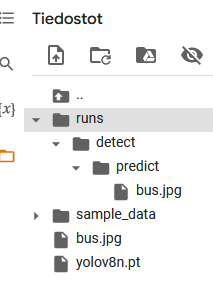

In [4]:
import matplotlib.pyplot as plt
import numpy as np

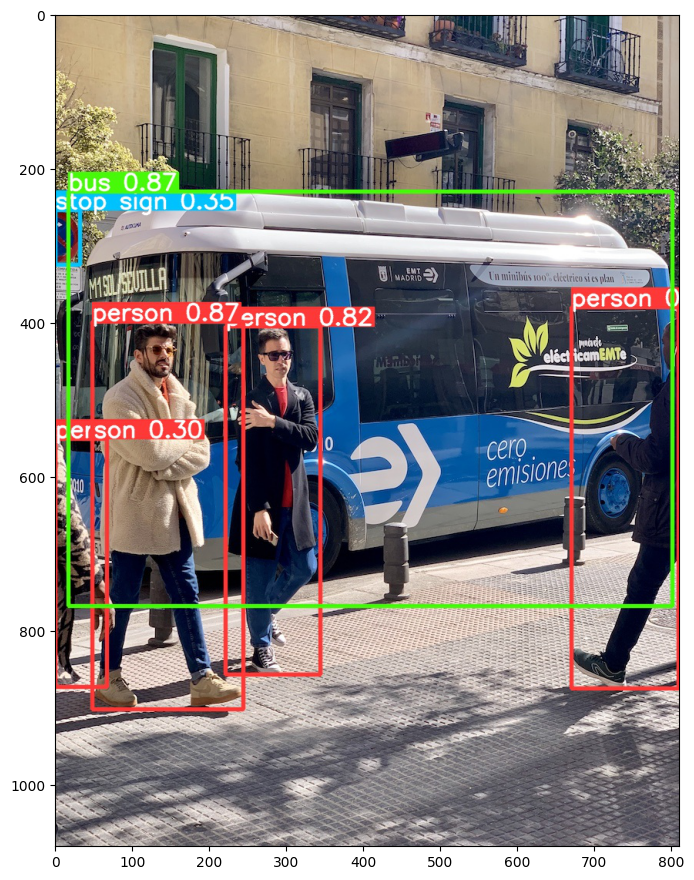

In [5]:
kuva=plt.imread('/content/runs/detect/predict/bus.jpg')
m,n,_=kuva.shape
plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva) #numerot ovat todennäköisyyksiä (confidence), että laatikoissa on kyseisen luokan objekti
plt.show()

In [6]:
predictions

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair',

In [8]:
#ennustetut laatikot 
laatikot=predictions[0].boxes.data.cpu().numpy() #.cpu(), jos GPU on käytössä 
laatikot

array([[     17.286,      230.59,      801.52,      768.41,     0.87054,           5],
       [     48.739,      399.26,       244.5,       902.5,     0.86898,           0],
       [     670.27,      380.28,      809.86,      875.69,      0.8536,           0],
       [     221.39,      405.79,      344.72,      857.39,     0.81931,           0],
       [   0.064347,      254.64,      32.288,      325.04,     0.34607,          11],
       [          0,      551.01,      67.105,      873.94,     0.30129,           0]], dtype=float32)

kukin rivi ennustaa yhden objektin: 

[xmin, ymin, xmax, ymax, confidence, luokka]


xmin, ymin, xmax, ymax ovat objektin sisältävän laatikon (bounding box) nurkkapisteiden koordinaatit

laatikossa on COCO-luokan luokka (5 = bus, 0 = person, 11 = stop sign) objekti todennäköisyydellä confidence

(YOLO laskee todennäköisyydet kaikille 80:lle COCO-luokalle, ja palauttaa suurimman) 

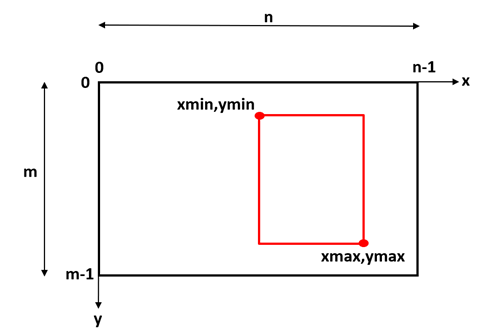

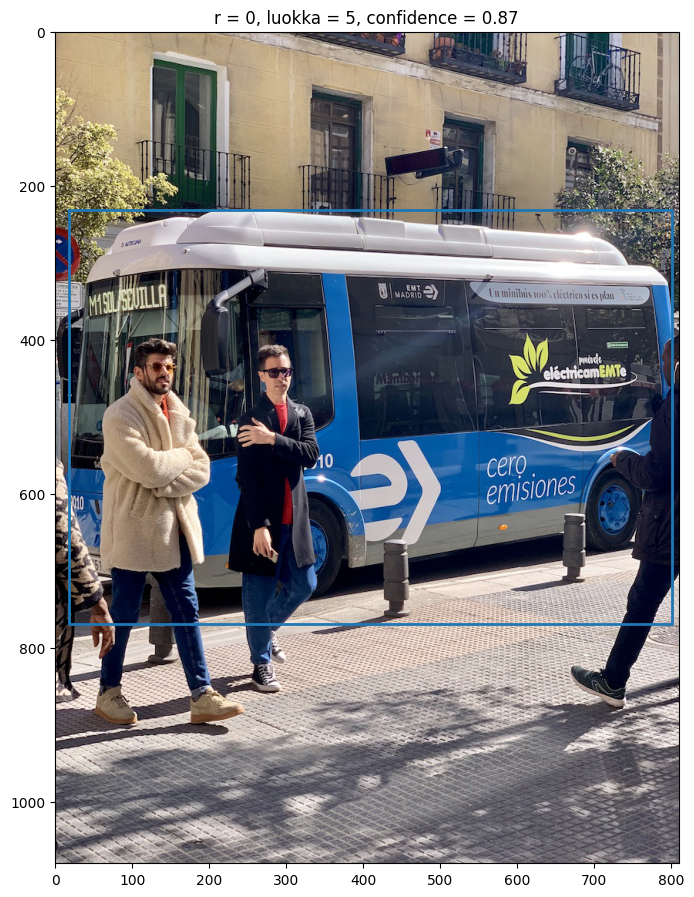

In [25]:
kuva=plt.imread('bus.jpg')
m,n,_=kuva.shape

plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)
M,_=laatikot.shape
r=np.random.randint(M)
xmin,ymin,xmax,ymax,conf,cls=laatikot[r,:]
plt.plot([xmin,xmin,xmax,xmax,xmin],[ymin,ymax,ymax,ymin,ymin],lw=2)
plt.title('r = '+str(r)+', luokka = '+str(int(cls))+', confidence = {:.2f}'.format(conf))
plt.show()

##**Oman datajoukon muodostaminen**

Oman datajoukon voi muodostaa lataamalla haluttuja objekteja sisältävät  kuvat ja (ground truth) laatikot [Open images](https://storage.googleapis.com/openimages/web/index.html)-kuvajoukosta käyttäen [OIDv4 Toolkit](https://github.com/theAIGuysCode/OIDv4_ToolKit)-työkalua.
[Image annotation](https://blog.roboflow.com/best-image-annotation-tools/)-työkaluilla  laatikot voi lisätä kuviinsa itse.








Ladataan oma datajoukko Open images-kuvajoukosta käyttäen OIDv4_ToolKittiä.

In [ ]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
%cd /content/OIDv4_ToolKit

/content/OIDv4_ToolKit


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyYAML: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=0115ad67dc6c4d57972ec98ac26a2887ea2416dc12052f29056e42c72daa9a30
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built PyYAML
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uni

Ladataan 1800 luokan Butterfly kuvaa, 1500 training- ja 300 validation/testi-kuvaa 

In [ ]:
!python main.py downloader --classes Butterfly --type_csv train --limit 1800 -y  


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Butterfly.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 49018 KB/s, 0 seconds passed
[DOWNLOAD] | File class-descriptions-boxable.c

In [ ]:
#siirretään 300 ensimmäistä kuvaa validaatio-kuviksi
import os 
import shutil
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation')
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation/Butterfly')
os.mkdir('/content/OIDv4_ToolKit/OID/Dataset/validation/Butterfly/Label')

filenames=os.listdir('/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly')
filenames.remove('Label')

sour='/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly/'
dest='/content/OIDv4_ToolKit/OID/Dataset/validation/Butterfly/'

for i in range(300):
  filename=filenames[i]
  shutil.move(sour+filename,dest+filename)
  piste=filename.find('.')
  labelname=filename[:piste]+'.txt'
  shutil.move(sour+'Label/'+labelname,dest+'Label/'+labelname)

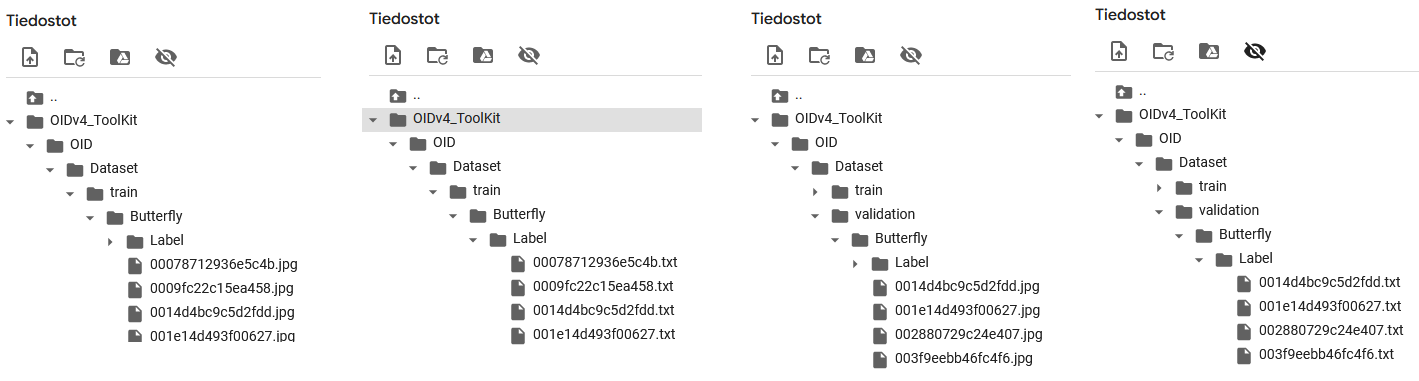

In [ ]:
#Huom: validaatiokuvia voi ladata myös komennolla

#!python main.py downloader --classes Butterfly --type_csv validation --limit 300 -y  

#mutta niitä on monelle luokalle tarjolla melko vähän, esimerkiksi Butterflylle vain 63


Label-kansion tekstitiedostot sisältävät laatikoissa olevan objektin luokan ja  laatikoiden nurkkapisteiden koordinaatit xmin, ymin, xmax, ymax



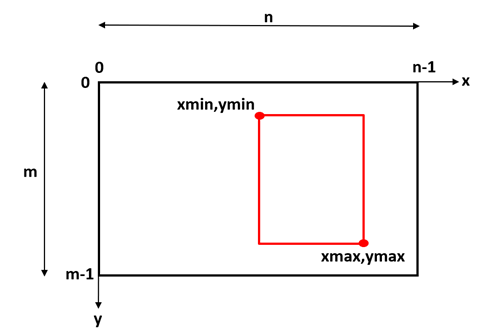

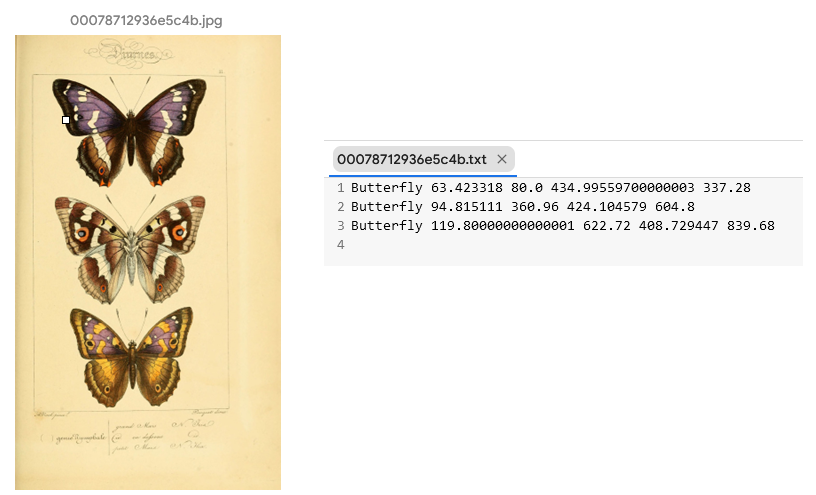

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

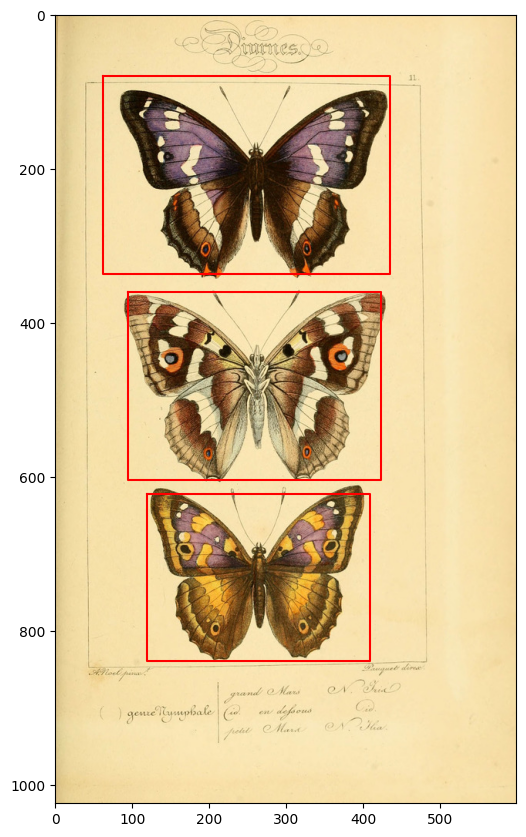

In [ ]:
#esimerkkikuva
filepath='/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly/00078712936e5c4b.jpg'
kuva=plt.imread(filepath)
m,n,_=kuva.shape
labelpath='/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly/Label/00078712936e5c4b.txt'
label=pd.read_csv(labelpath,header=None,sep='\s+')
label=np.array(label.iloc[:,1:])

if len(label.shape)==1: #jos vain yksi laatikko
  label=np.expand_dims(label,axis=0) #1D-vektori->2D-vaakavektori

M=label.shape[0]

plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)
for r in range(M):
  xmin,ymin,xmax,ymax=label[r,:]
  plt.plot([xmin,xmax,xmax,xmin,xmin],[ymin,ymin,ymax,ymax,ymin],'r')
plt.show()

Muunnetaan laatikoiden koordinaatit YOLO-muotoon:

[Butterfly, xmin, ymin, xmax, ymax] $\to$ [0, xc/n, yc/m, w/n, h/m]


missä xc ja yc ovat laatikon keskipisteen koordinaatit, w ja  h laatikon leveys ja korkeus, n ja m kuvan leveys ja korkeus 

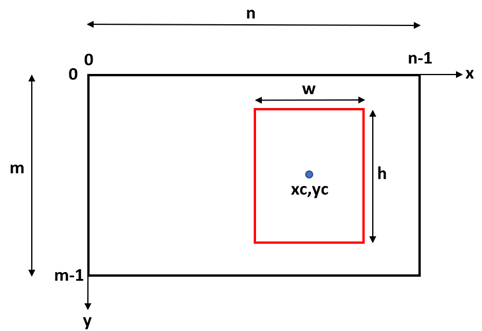

käyttäen  OIDv4-ToolKitin tiedostoa convert_annotations.py

Päivitetään ensin luokkien nimet tiedostoon classes.txt (tuplaklikataan auki Colabissa)

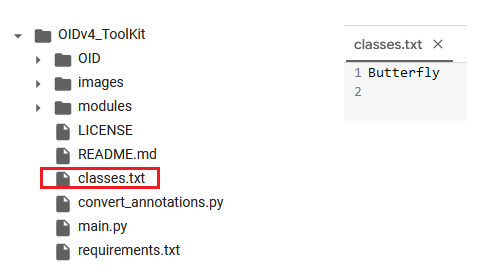

In [ ]:
!python convert_annotations.py

Currently in subdirectory: validation
Converting annotations for class:  Butterfly
100% 300/300 [00:10<00:00, 29.16it/s]
Currently in subdirectory: train
Converting annotations for class:  Butterfly
100% 1500/1500 [01:01<00:00, 24.27it/s]


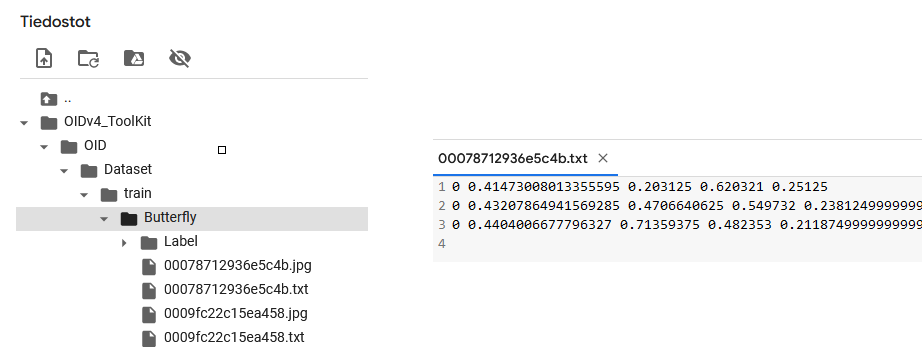

In [ ]:
#poistetaan Label-kansiot
shutil.rmtree('/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly/Label')
shutil.rmtree('/content/OIDv4_ToolKit/OID/Dataset/validation/Butterfly/Label')

In [ ]:
#luodaan train- ja validaatiodatan kuville ja labeleille omat kansiot
os.mkdir('/content/train')
os.mkdir('/content/train/images')
os.mkdir('/content/train/labels')
os.mkdir('/content/valid')
os.mkdir('/content/valid/images')
os.mkdir('/content/valid/labels')

In [ ]:
#siirretään kuvat ja labelit
dir='/content/OIDv4_ToolKit/OID/Dataset/train/Butterfly/'
filenames=os.listdir(dir)

for filename in filenames:
  filepath=dir + filename
  if filename.endswith(".txt"):    
    shutil.move(filepath,'/content/train/labels/' + filename)
  else:
    shutil.move(filepath,'/content/train/images/' + filename)

dir='/content/OIDv4_ToolKit/OID/Dataset/validation/Butterfly/'
filenames=os.listdir(dir)

for filename in filenames:
  filepath=dir + filename
  if filename.endswith(".txt"):    
    shutil.move(filepath,'/content/valid/labels/' + filename)
  else:    
    shutil.move(filepath,'/content/valid/images/' + filename)  

In [ ]:
#pakataan ja viedään Driveen
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.mkdir('/content/drive/MyDrive/YOLOv8')
os.mkdir('/content/drive/MyDrive/YOLOv8/train')
os.mkdir('/content/drive/MyDrive/YOLOv8/valid')

In [ ]:
%cd /content/train/images
!zip -r /content/drive/MyDrive/YOLOv8/train/images.zip ./
%cd /content/train/labels
!zip -r /content/drive/MyDrive/YOLOv8/train/labels.zip ./

/content/train/images
  adding: 6b3452a4bb9d5190.jpg (deflated 0%)
  adding: 041da31554d506f7.jpg (deflated 0%)
  adding: a5eb194a67ca4a4e.jpg (deflated 0%)
  adding: 3a309516e54450ab.jpg (deflated 1%)
  adding: fd448a967a8e161d.jpg (deflated 0%)
  adding: a9a036daba47e828.jpg (deflated 0%)
  adding: 478e0460ba2da4d2.jpg (deflated 0%)
  adding: 44652ba938526872.jpg (deflated 1%)
  adding: ceb0e26345329ffb.jpg (deflated 0%)
  adding: c030ae35e391ef68.jpg (deflated 0%)
  adding: 4f9db20e1a18cedd.jpg (deflated 1%)
  adding: 0699bb88b2a35fdd.jpg (deflated 0%)
  adding: 89b58139fd13e6b6.jpg (deflated 0%)
  adding: bc89a2326544af3d.jpg (deflated 0%)
  adding: 7b45d6960afdd3e5.jpg (deflated 1%)
  adding: eacf52a86a663fcb.jpg (deflated 0%)
  adding: 0ab26032f30d320a.jpg (deflated 0%)
  adding: 124e77fe8568ea90.jpg (deflated 0%)
  adding: 1af164be493b2eda.jpg (deflated 0%)
  adding: 8eb900adeb39c427.jpg (deflated 1%)
  adding: 76dd358c473a47fb.jpg (deflated 0%)
  adding: df5ca0b58c65e823.jpg (d

In [ ]:
%cd /content/valid/images
!zip -r /content/drive/MyDrive/YOLOv8/valid/images.zip ./
%cd /content/valid/labels
!zip -r /content/drive/MyDrive/YOLOv8/valid/labels.zip ./

/content/valid/images
  adding: d17c2b4c01e3b560.jpg (deflated 0%)
  adding: 0d5f85d0dce424ef.jpg (deflated 0%)
  adding: 03c36f458963141f.jpg (deflated 0%)
  adding: 7570283e795b2635.jpg (deflated 0%)
  adding: bd3fffaef53f67a3.jpg (deflated 0%)
  adding: ac9207bc65536c11.jpg (deflated 0%)
  adding: 43aa3c2ca339959c.jpg (deflated 0%)
  adding: 887c10fc647262d7.jpg (deflated 0%)
  adding: 4253fe3d9557f417.jpg (deflated 0%)
  adding: 63c2948427b41934.jpg (deflated 0%)
  adding: b7651ec516b465b6.jpg (deflated 0%)
  adding: c85e579a1ea96ca3.jpg (deflated 0%)
  adding: 22fb8b8c51dea965.jpg (deflated 0%)
  adding: 2d9df3740fd9a795.jpg (deflated 0%)
  adding: c75924a297fa12fd.jpg (deflated 0%)
  adding: ec558453b379f812.jpg (deflated 0%)
  adding: 34c9d29752f103ac.jpg (deflated 0%)
  adding: bef08ffd3a960654.jpg (deflated 0%)
  adding: 3a640aa99e9f8713.jpg (deflated 0%)
  adding: b104beb38859becd.jpg (deflated 0%)
  adding: 4c009b168aecabe0.jpg (deflated 0%)
  adding: f2685c6eac055b35.jpg (d

##**Custom weights**

Koulutetaan YOLOv8-verkko tunnistamaan ja paikallistamaan kuvista perhosia edellä muodostetun datajoukon avulla. 


Tässä kannattaa käyttää GPU:ta (Suorituspalvelu / Muuta suorituspalvelun tyyppiä)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#luodaan datalle kansiot Colabiin ja puretaan se niihin Drivestä
import os
os.makedirs('/content/custom_data')
os.makedirs('/content/custom_data/train')
os.makedirs('/content/custom_data/valid')
os.makedirs('/content/custom_data/train/images')
os.makedirs('/content/custom_data/valid/images')
os.makedirs('/content/custom_data/train/labels')
os.makedirs('/content/custom_data/valid/labels')

In [ ]:
!unzip '/content/drive/MyDrive/YOLOv8/train/images.zip' -d '/content/custom_data/train/images'

Archive:  /content/drive/MyDrive/YOLOv8/train/images.zip
  inflating: /content/custom_data/train/images/6b3452a4bb9d5190.jpg  
  inflating: /content/custom_data/train/images/041da31554d506f7.jpg  
  inflating: /content/custom_data/train/images/a5eb194a67ca4a4e.jpg  
  inflating: /content/custom_data/train/images/3a309516e54450ab.jpg  
  inflating: /content/custom_data/train/images/fd448a967a8e161d.jpg  
  inflating: /content/custom_data/train/images/a9a036daba47e828.jpg  
  inflating: /content/custom_data/train/images/478e0460ba2da4d2.jpg  
  inflating: /content/custom_data/train/images/44652ba938526872.jpg  
  inflating: /content/custom_data/train/images/ceb0e26345329ffb.jpg  
  inflating: /content/custom_data/train/images/c030ae35e391ef68.jpg  
  inflating: /content/custom_data/train/images/4f9db20e1a18cedd.jpg  
  inflating: /content/custom_data/train/images/0699bb88b2a35fdd.jpg  
  inflating: /content/custom_data/train/images/89b58139fd13e6b6.jpg  
  inflating: /content/custom_data

In [ ]:
!unzip '/content/drive/MyDrive/YOLOv8/train/labels.zip' -d '/content/custom_data/train/labels'

Archive:  /content/drive/MyDrive/YOLOv8/train/labels.zip
  inflating: /content/custom_data/train/labels/2cfe4af4c6bc10c9.txt  
  inflating: /content/custom_data/train/labels/238284293944fbd9.txt  
  inflating: /content/custom_data/train/labels/83858d39a81ee169.txt  
  inflating: /content/custom_data/train/labels/ebd9194f10b04bbd.txt  
  inflating: /content/custom_data/train/labels/03894f13493a0403.txt  
  inflating: /content/custom_data/train/labels/45782f53433dffed.txt  
  inflating: /content/custom_data/train/labels/4ba7804ef4e79b79.txt  
  inflating: /content/custom_data/train/labels/b647fe58d4b55e59.txt  
  inflating: /content/custom_data/train/labels/8d14ba7330cb225f.txt  
  inflating: /content/custom_data/train/labels/2b0929b0eb40735b.txt  
  inflating: /content/custom_data/train/labels/5da1129b5c3b8c15.txt  
  inflating: /content/custom_data/train/labels/617bdd6774d9582a.txt  
  inflating: /content/custom_data/train/labels/070527183bf53465.txt  
  inflating: /content/custom_data

In [ ]:
!unzip '/content/drive/MyDrive/YOLOv8/valid/images.zip' -d '/content/custom_data/valid/images'

Archive:  /content/drive/MyDrive/YOLOv8/valid/images.zip
  inflating: /content/custom_data/valid/images/d17c2b4c01e3b560.jpg  
  inflating: /content/custom_data/valid/images/0d5f85d0dce424ef.jpg  
  inflating: /content/custom_data/valid/images/03c36f458963141f.jpg  
  inflating: /content/custom_data/valid/images/7570283e795b2635.jpg  
  inflating: /content/custom_data/valid/images/bd3fffaef53f67a3.jpg  
  inflating: /content/custom_data/valid/images/ac9207bc65536c11.jpg  
  inflating: /content/custom_data/valid/images/43aa3c2ca339959c.jpg  
  inflating: /content/custom_data/valid/images/887c10fc647262d7.jpg  
  inflating: /content/custom_data/valid/images/4253fe3d9557f417.jpg  
  inflating: /content/custom_data/valid/images/63c2948427b41934.jpg  
  inflating: /content/custom_data/valid/images/b7651ec516b465b6.jpg  
  inflating: /content/custom_data/valid/images/c85e579a1ea96ca3.jpg  
  inflating: /content/custom_data/valid/images/22fb8b8c51dea965.jpg  
  inflating: /content/custom_data

In [ ]:
!unzip '/content/drive/MyDrive/YOLOv8/valid/labels.zip' -d '/content/custom_data/valid/labels'

Archive:  /content/drive/MyDrive/YOLOv8/valid/labels.zip
  inflating: /content/custom_data/valid/labels/ba162ea16971b823.txt  
  inflating: /content/custom_data/valid/labels/3e75afdbf188843e.txt  
  inflating: /content/custom_data/valid/labels/d9a672b2d459a80c.txt  
  inflating: /content/custom_data/valid/labels/e7cc4655ad246d91.txt  
  inflating: /content/custom_data/valid/labels/4ce1a95650d89d40.txt  
  inflating: /content/custom_data/valid/labels/d8f3548150df5a47.txt  
  inflating: /content/custom_data/valid/labels/3912da897de707a8.txt  
  inflating: /content/custom_data/valid/labels/1bcf0d150989fcd0.txt  
  inflating: /content/custom_data/valid/labels/fa77f6b2340bbaf4.txt  
  inflating: /content/custom_data/valid/labels/f30bcaf2fb3b504d.txt  
  inflating: /content/custom_data/valid/labels/b1445d6bfe17d44a.txt  
  inflating: /content/custom_data/valid/labels/aba6b67464abeb45.txt  
  inflating: /content/custom_data/valid/labels/daf7144246ba04e7.txt  
  inflating: /content/custom_data

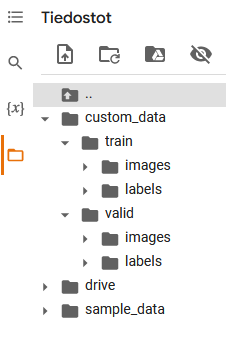

Luodaan polut ja luokkanimet sisältävä tiedosto custom_data.yaml ja ladataan se Colabiin.

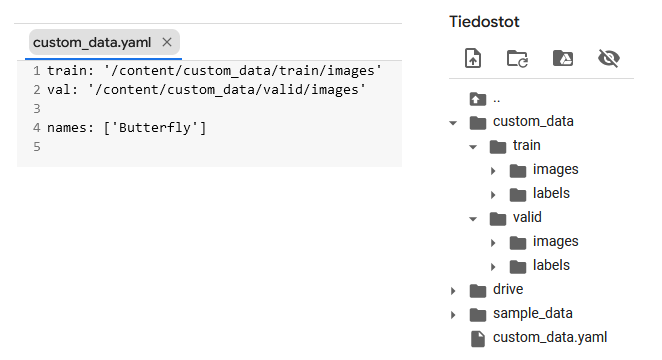

In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/YOLOv8/custom_data.yaml','/content')

'/content/custom_data.yaml'

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt') #käytetään COCO-kuvajoukkoon esikoulutettuja kertoimia lähtöarvoina

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.9MB/s]


In [ ]:
#koulutetaan verkko oman datajoukon perusteella (tämä tarvitsee GPU:ta, on muuten hidasta)
model.train(data='/content/custom_data.yaml',epochs=30,imgsz=640,cache=True)

#jos haluat jatkaa lisää epocheja, niin vaihda
#model=YOLO('/content/runs/detect/train/weights/last.pt')
#model.train(data='/content/custom_data.yaml',epochs=30,imgsz=640,cache=True)

Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/custom_data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [ ]:
#kopioidaan parhaat kertoimet talteen Driveen 
import shutil
sour='/content/runs/detect/train/weights/best.pt'
dest='/content/drive/MyDrive/YOLOv8/Butterfly.pt'
shutil.copy(sour,dest)

'/content/drive/MyDrive/YOLOv8/Butterfly.pt'

In [ ]:
#ladataan parhaat kertoimet
#!pip install ultralytics
#from ultralytics import YOLO
model=YOLO('/content/drive/MyDrive/YOLOv8/Butterfly.pt')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


image 1/1 /content/custom_data/valid/images/11539c03bc51aeca.jpg: 448x640 1 Butterfly, 77.4ms
Speed: 11.6ms preprocess, 77.4ms inference, 35.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[[     115.92      11.366      767.43      620.77     0.86478           0]]


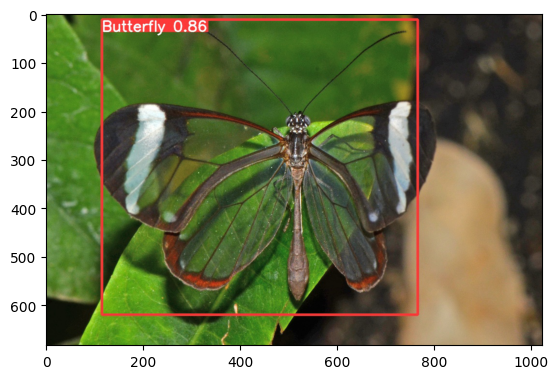

In [ ]:
#ennuste testikuvalle (tämä onnistuu ilman GPU:ta)
dir = '/content/custom_data/valid/'
kuvanimet=os.listdir(dir+'images')
N=len(kuvanimet)
k=np.random.randint(N)
kuvanimi=kuvanimet[k]

predictions=model.predict(dir+'images/'+kuvanimi,save=True) #conf=0.5: näyttää vain ennusteet, joiden confidence>0.5
predictions=predictions[0].boxes.data.cpu().numpy() #tarvitaan .cpu(), jos GPU käytössä 
print(predictions) #[xmin,ymin,xmax,ymax,confidence,luokka]

pred=plt.imread('/content/runs/detect/predict/'+kuvanimi)
plt.imshow(pred)
plt.show()

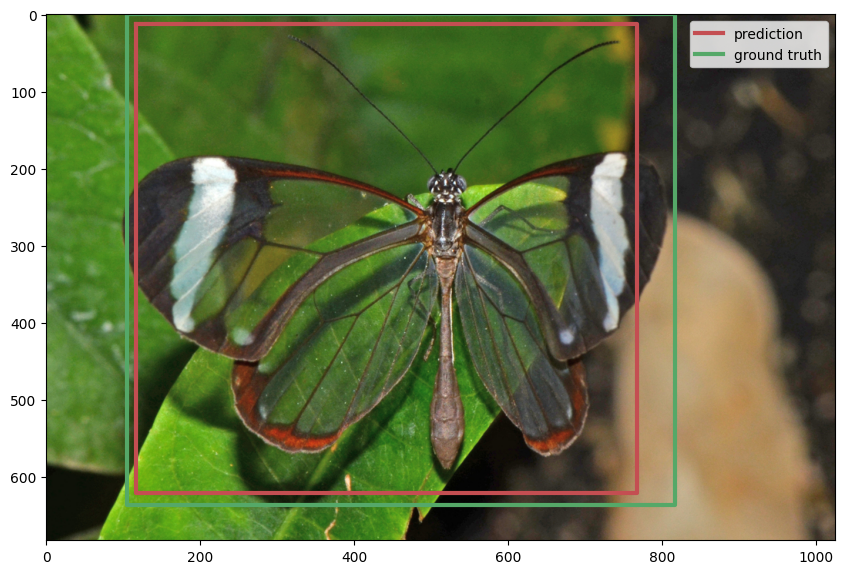

IoU = 0.8762116005545719


In [ ]:
#ennustetut ja ground truth laatikot testikuvalle 

mp=predictions.shape[0] #ennustettujen laatikoiden lukumäärä 


ind=kuvanimi.find('.')
labelnimi=kuvanimi[:ind]+'.txt'
labels=np.loadtxt(dir+'/labels/'+labelnimi)
#jos vain yksi ground truth laatikko, niin muutetaan labels 1D-arraysta 2D-arrayksi (vaakavektoriksi)
if len(labels.shape)==1:
  labels=np.expand_dims(labels,axis=0)

ml=labels.shape[0] #ground truth laatikoiden lukumäärä

kuva=plt.imread(dir+'images/'+kuvanimi)
m,n=kuva.shape[:2]

plt.figure(figsize=(n/100,m/100))
plt.imshow(kuva)

#ennustetut laatikot
for r in range(mp):
  Xmin,Ymin,Xmax,Ymax,Conf,Luokka=predictions[r,:] #Conf(idence) = todennäköisyys, että laatikossa on Luokan objekti
  plt.plot([Xmin,Xmin,Xmax,Xmax,Xmin],[Ymin,Ymax,Ymax,Ymin,Ymin],'r',lw=3,label='prediction')
  
#ground truth laatikot
for r in range(ml):
  luokka,xc,yc,w,h=labels[r,:]
  xc*=n
  yc*=m
  w*=n
  h*=m
  xmin=xc-w/2
  ymin=yc-h/2
  xmax=xc+w/2
  ymax=yc+h/2
  plt.plot([xmin,xmin,xmax,xmax,xmin],[ymin,ymax,ymax,ymin,ymin],'g',lw=3,label='ground truth')
plt.legend()  
plt.show()


#IoU
#intersectionin nurkkapisteet
Ixmin=max([Xmin,xmin])
Iymin=max([Ymin,ymin])
Ixmax=min([Xmax,xmax])
Iymax=min([Ymax,ymax])
#intersectionin pinta-ala
A_of_I=(Ixmax-Ixmin)*(Iymax-Iymin)
#unionin pinta-ala
A_of_U=(Xmax-Xmin)*(Ymax-Ymin)+(xmax-xmin)*(ymax-ymin)-A_of_I

IoU=A_of_I/A_of_U
print('IoU = '+str(IoU))

Mittari ennustettujen ja ground truth laatikoiden yhteensopivuudelle: 

$$
\textrm{IoU = Intersection over Union} = \frac{\textrm{intersectionin pinta-ala}}{\text{unionin pinta-ala}}$$ 


$$
\begin{array}{l}
\\
\end{array}
$$

Jos ennustettu ja ground truth laatikko ovat hyvin päällekkäin, niin $\textrm{IoU}\approx 1$ 


Jos ennustettu ja ground truth laatikko ovat huonosti päällekkäin, niin $\textrm{IoU}\approx 0$ 





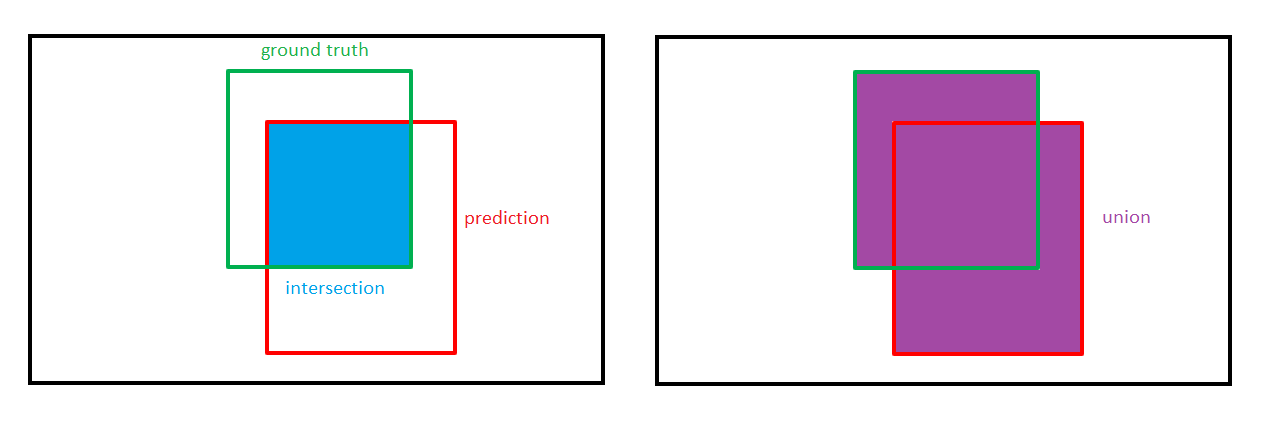

 

Jos $\textrm{IoU}\ge $ IoU-threshold, niin ennuste on oikein eli true positive 

Jos $\textrm{IoU}<$ IoU-threshold, niin ennuste on väärin eli false positive 

$$
\begin{array}{l}
\\
\end{array}
$$


P = Precision = $\displaystyle{\frac{\textrm{true positives}}{\textrm{all predictions}}}$ = kuinka suuri osa ennusteista on oikein

$$
\begin{array}{l}
\\
\end{array}
$$

R = Recall = $\displaystyle{\frac{\textrm{true positives}}{\textrm{all ground truths}}}$ = kuinka suuri osa ground truth laatikoista ennustetaan oikein 

$$
\begin{array}{l}
\\
\end{array}
$$












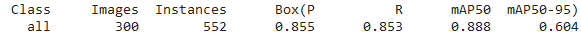

Validaatiokuville P = 0.855 ja R = 0.853, kun IoU-threshold = 0.5


AP = average precision lasketaan ennustettujen laatikoiden todennäköisyyksien avulla (kullekin objektiluokalle)

[mAP](https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173) = mean average precision = eri objektiluokkien AP:iden keskiarvo 



mAP50 = mAP @ 0.5 = mean average precision, kun IoU-threshold = 0.5 

mAP50-95 = mAP @ 0.5:0.05:0.95 = keskiarvo mean averarage precisioneista, kun IoU-threshold = 0.5,0.55,...,0.95

Parhaat kertoimet: pienin fitness  = 0.1$*$mAP50 + 0.9$*$mAP50-95   validaatiodatalle

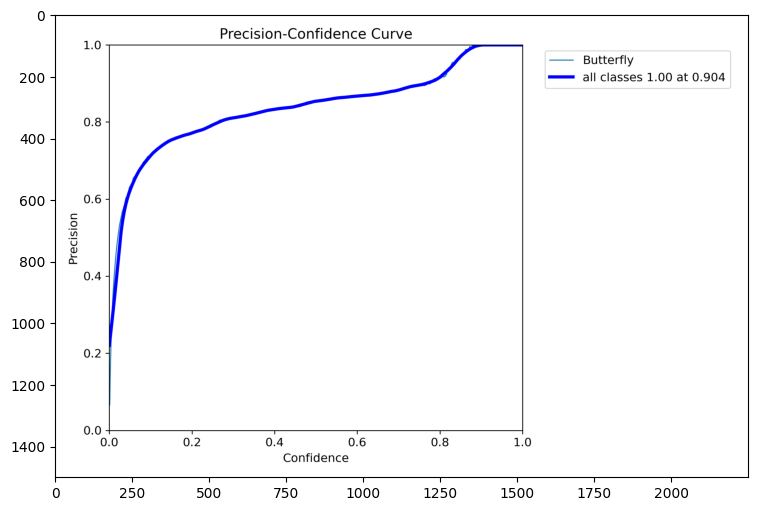

In [ ]:
#vaaka-akselilla ennustettujen laatikoiden todennäköisyys (confidence)
#pystyakselilla precision niille ennusteille, joiden todennäköisyys on
#vähintään vaaka-akselin confidence(threshold) (IoU-threshold = 0.5)
P_curve=plt.imread('/content/runs/detect/train/P_curve.png')
plt.figure(figsize=(10,6))
plt.imshow(P_curve)
plt.show()

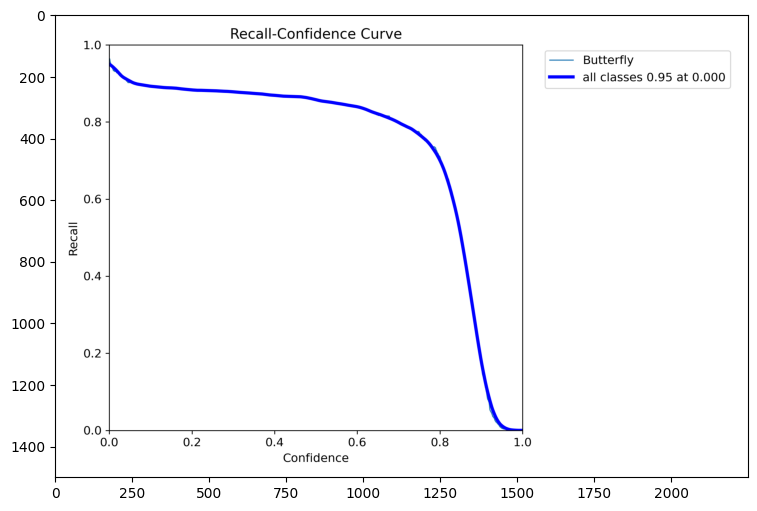

In [ ]:
#vaaka-akselilla ennustettujen laatikoiden todennäköisyys (confidence)
#pystyakselilla recall niille ennusteille, joiden todennäköisyys on
#vähintään vaaka-akselin confidence(threshold) (IoU-threshold = 0.5)
R_curve=plt.imread('/content/runs/detect/train/R_curve.png')
plt.figure(figsize=(10,6))
plt.imshow(R_curve)
plt.show()

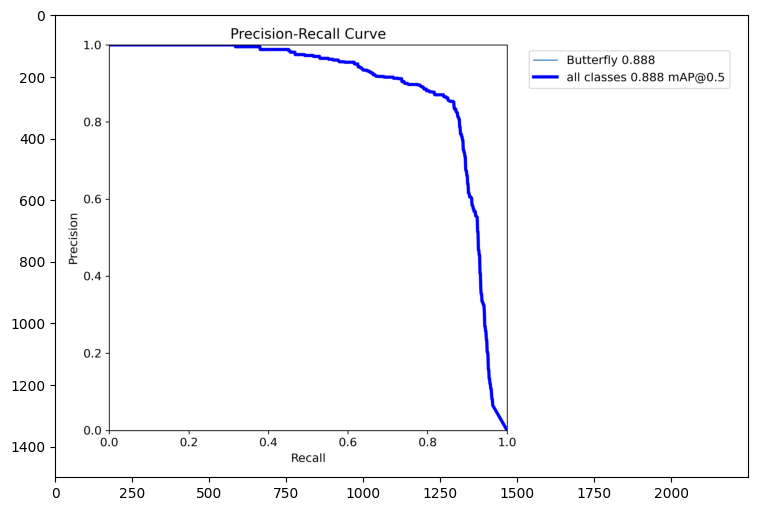

In [ ]:
#kahden edellisen "yhdiste", AP on käyrän alle jäävä pinta-ala
PR_curve=plt.imread('/content/runs/detect/train/PR_curve.png')
plt.figure(figsize=(10,6))
plt.imshow(PR_curve)
plt.show()

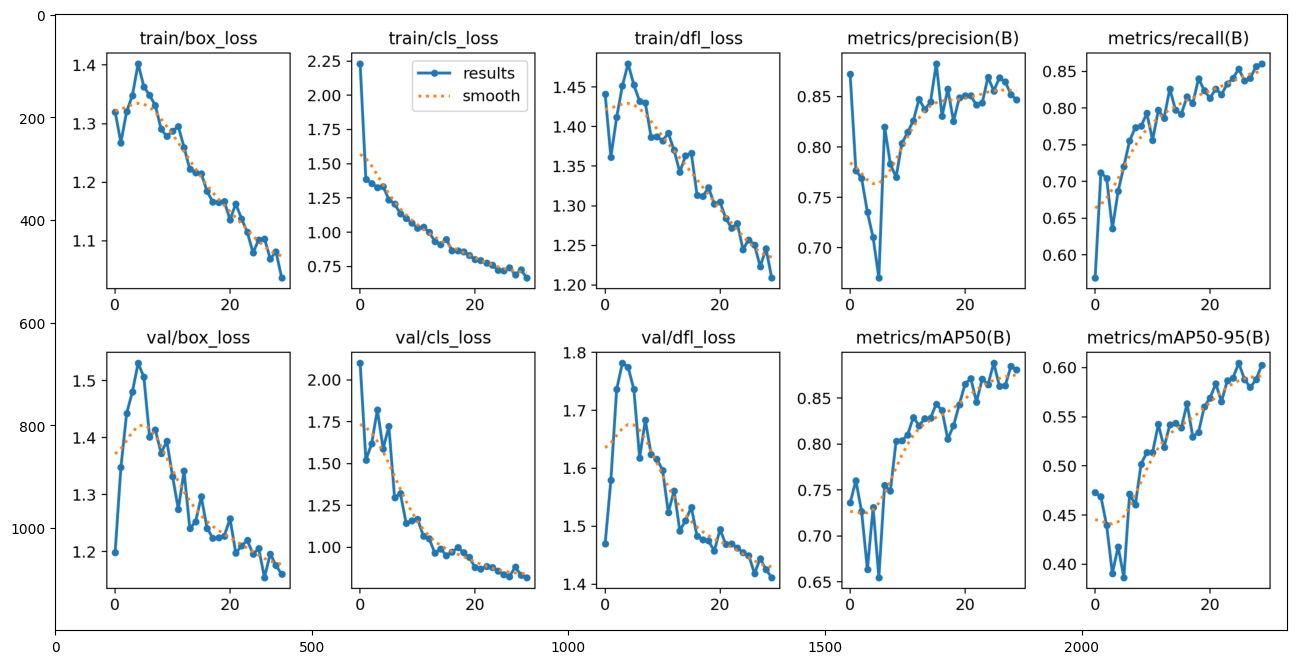

In [ ]:
#minimoitavan kustannusfunktion osien (box_loss, cls_loss, dfl_loss), precisionin, recallin ja mAPien arvojen kehitys, vaaka-akselilla epoch
results=plt.imread('/content/runs/detect/train/results.png')
plt.figure(figsize=(16,8))
plt.imshow(results)
plt.show()